In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


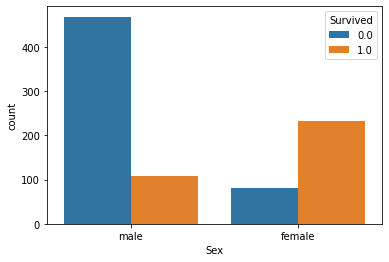

In [49]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.info()
data = train.append(test)
data.reset_index(inplace=True, drop=True)
# print(data.tail(10))
# print(list(data["Survaived"]))
# print(list(train["Survived"]))
# sns.countplot(x="Survived", data=train)
# sns.countplot(x="Pclass", hue="Survived", data=data)
# plt.show()
sns.countplot(x="Sex", hue="Survived", data=data)
plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='count'>

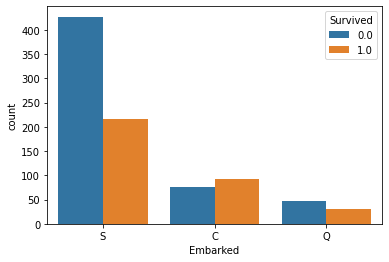

In [50]:
sns.countplot(x="Embarked", hue="Survived", data=data)

/home/fisheep/TEST/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


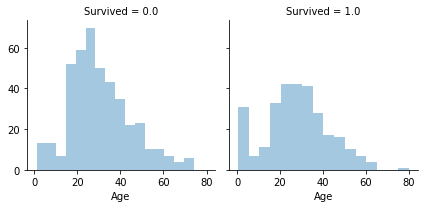

In [51]:
g = sns.FacetGrid(data, col="Survived")
g.map(sns.distplot, 'Age', kde=False)

/home/fisheep/TEST/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


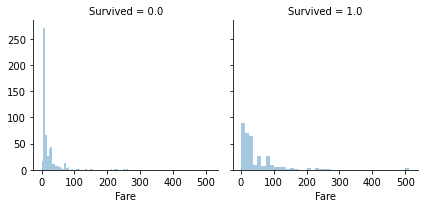

In [52]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)

/home/fisheep/TEST/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


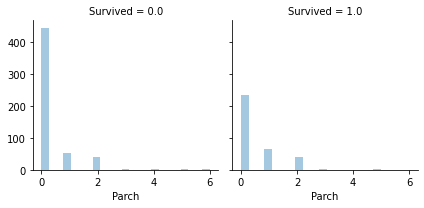

In [53]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, "Parch", kde=False)

/home/fisheep/TEST/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


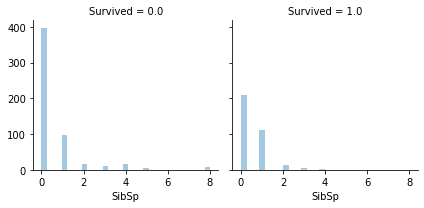

In [54]:
g = sns.FacetGrid(data, col="Survived")
g.map(sns.distplot, "SibSp", kde=False)


/home/fisheep/TEST/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


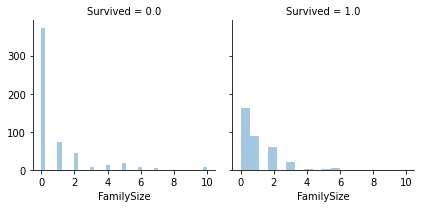

In [55]:
data["FamilySize"] = data["SibSp"] + data["Parch"]
g = sns.FacetGrid(data, col="Survived")
g.map(sns.distplot, "FamilySize", kde=False)

In [56]:
data["Title"] = data["Name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
data["Title"].unique()
pd.crosstab(data["Title"], data["Sex"]).T.style.background_gradient(cmap="summer_r")

Title,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [57]:
pd.crosstab(data["Title"], data["Survived"]).T
data.groupby(["Title"])["Age"].mean()

Title
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [58]:
data["Title"] = data["Title"].replace(
    ["Capt", "Col", "Don", "Dona", "Dr", "Jonkheer", "Lady", "Major", "Mlle", "Mme", "Rev", "Sir", "the Countess", "Ms"],
    ["Mr", "Mr", "Mr", "Miss", "Mr", "Mr", "Mrs", "Mr", "Miss", "Mrs", "Mr", "Mr", "Mrs", "Mrs"])
data["Title"].unique()
pd.crosstab(data["Title"], data["Survived"]).T.style.background_gradient(cmap="summer_r")

Title,Master,Miss,Mr,Mrs
Survived,,,,
0.0,17,55,451,26
1.0,23,129,87,103


In [59]:
data["Cabin"] = data["Cabin"].apply(lambda x : str(x)[0] if not pd.isnull(x) else "NoCabin")
data["Cabin"].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [94]:
data_after = data.loc[:, ["Pclass", "Sex", "FamilySize", "Embarked", "Title", "Fare", "Cabin","Survived"]]
data_after["Sex"].replace(["male", "female"], [1, 0], inplace=True)
data_after["Embarked"].replace(["S", "C", "Q", np.nan], [0, 1, 2, 0], inplace=True)
data_after["Title"].replace(["Mr", "Mrs", "Miss", "Master"], [0, 1, 2, 3], inplace=True)
data_after["Fare"] = data_after["Fare"].fillna(data['Fare'].mean())
data_after["Cabin"] = data["Cabin"].astype("category").cat.codes
# print(data_after["Pclass"].unique())
# print(data_after["Sex"].unique())
# print(data_after["Embarked"].unique())
# print(data_after["Title"].unique())
# print(data_after["Fare"].unique())
# print(data_after["FamilySize"].unique())
numpy_data = data_after.to_numpy()
print(numpy_data)
numpy_data[:, :-1] = numpy_data[:, :-1] / numpy_data[:, :-1].max(axis=0)
numpy_data

[[ 3.      1.      1.     ...  7.25    7.      0.    ]
 [ 1.      0.      1.     ... 71.2833  2.      1.    ]
 [ 3.      0.      0.     ...  7.925   7.      1.    ]
 ...
 [ 3.      1.      0.     ...  7.25    7.         nan]
 [ 3.      1.      0.     ...  8.05    7.         nan]
 [ 3.      1.      2.     ... 22.3583  7.         nan]]


array([[1.        , 1.        , 0.1       , ..., 0.01415106, 0.875     ,
        0.        ],
       [0.33333333, 0.        , 0.1       , ..., 0.13913574, 0.25      ,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.01546857, 0.875     ,
        1.        ],
       ...,
       [1.        , 1.        , 0.        , ..., 0.01415106, 0.875     ,
               nan],
       [1.        , 1.        , 0.        , ..., 0.01571255, 0.875     ,
               nan],
       [1.        , 1.        , 0.2       , ..., 0.0436405 , 0.875     ,
               nan]])

In [95]:
from sklearn import datasets
from sklearn import metrics
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X_train, y_train, X_test, pass_id = numpy_data[:891, :-1], numpy_data[:891, -1], numpy_data[891:, :-1], data.loc[891:,"PassengerId"].to_numpy() 
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=777)
# print(X_train.shape, X_valid.shape)
# print(y_train.shape, y_valid.shape)
parameter_candidates = [
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['poly']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)
print(X_train.shape, y_train.shape)
clf.fit(X_train, y_train)
print('Best score for training data:', clf.best_score_)
print('Best `C`:',clf.best_estimator_.C)
print('Best kernel:',clf.best_estimator_.kernel)
print('Best `gamma`:',clf.best_estimator_.gamma)
# y_valid_pred = clf.predict(X_valid)
# print(X_valid.shape, y_valid_pred)
# print(metrics.confusion_matrix(y_valid, y_valid_pred))
# print(metrics.classification_report(y_valid, y_valid_pred))
print("X_test", X_test.shape)
y_test_pred = clf.predict(X_test)
print(pass_id.shape, y_test_pred.shape)
answer = pd.DataFrame({"PassengerId": pass_id, "Survived": y_test_pred})
answer["Survived"] = answer["Survived"].astype("int")
answer.to_csv("predict.csv", index=0)
print(answer)

(891, 7) (891,)
Best score for training data: 0.7889900194589166
Best `C`: 1000
Best kernel: rbf
Best `gamma`: 0.001
X_test (418, 7)
(418,) (418,)
     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [96]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=2,n_estimators=2000,min_samples_split=20,oob_score=True, n_jobs=-1)
rf.fit(X_train, y_train)
print("%.4f" % rf.oob_score_)
rf_res = rf.predict(X_test)
rf_res = rf_res.astype(int)
# print(rf_res)
answer = pd.DataFrame({"PassengerId": pass_id, "Survived": rf_res})
# answer["Survived"] = answer["Survived"].astype("int")
answer.to_csv("predict1.csv", index=0)
print(answer)

0.8294
     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]
